In [2]:
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv -O train.csv

--2018-09-16 12:40:37--  https://datahack-prod.s3.amazonaws.com/train_file/train_LZdllcl.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.12
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3759647 (3.6M) [application/vnd.ms-excel]
Saving to: ‘train.csv’

train.csv           100%[=====================>]   3.58M   491KB/s   in 23s    

2018-09-16 12:41:02 (159 KB/s) - ‘train.csv’ saved [3759647/3759647]



In [3]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv -O test.csv

--2018-09-16 12:41:02--  https://datahack-prod.s3.amazonaws.com/test_file/test_2umaH9m.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.62.40
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.62.40|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1565147 (1.5M) [application/vnd.ms-excel]
Saving to: ‘test.csv’

test.csv            100%[=====================>]   1.49M   152KB/s   in 19s    

2018-09-16 12:41:22 (81.6 KB/s) - ‘test.csv’ saved [1565147/1565147]



In [4]:
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv -O sample_submission.csv

--2018-09-16 12:41:22--  https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_M0L0uXE.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.64.0
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.64.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208067 (203K) [application/vnd.ms-excel]
Saving to: ‘sample_submission.csv’

sample_submission.c 100%[=====================>] 203.19K  43.9KB/s   in 4.6s   

2018-09-16 12:41:28 (43.9 KB/s) - ‘sample_submission.csv’ saved [208067/208067]



In [5]:
# Import the required packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [6]:
# Read the train and test data
train=pd.read_csv("train.csv")
train.drop('employee_id',inplace=True,axis = 1)
test=pd.read_csv("test.csv")

In [7]:
# Check the variables in train data
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [8]:
# Print datatype of each variable
train.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [9]:
# Dimension of the train dataset
train.shape

(54808, 13)

In [10]:
# Print the head of train dataset
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [11]:
# Unique values in each variable of train dataset
train.nunique()

department               9
region                  34
education                3
gender                   2
recruitment_channel      3
no_of_trainings         10
age                     41
previous_year_rating     5
length_of_service       35
KPIs_met >80%            2
awards_won?              2
avg_training_score      61
is_promoted              2
dtype: int64

### Univariate Analysis

#### Target Variable

In [ ]:
train['is_promoted'].value_counts(normalize=True)

In [ ]:
# Around 91% trainee have promoted
# Unbalanced dataset 

#### Categorical Independent Variables

In [ ]:
plt.figure(1)
plt.subplot(221)
train['department'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Department')

plt.subplot(222)
train['awards_won?'].value_counts(normalize=True).plot.bar(title= 'Awards won')

plt.subplot(223)
train['education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.subplot(224)
train['gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

plt.show()

In [ ]:
# Most of the trainee are enrolled for Y and T program_type.
# More number of trainee enrolment for offline test than online test.
# Most of the test are easy in terms of difficulty level.

In [ ]:
train['KPIs_met >80%'].value_counts(normalize=True).plot.bar(title= 'KPI met greater than 80')


In [ ]:
plt.figure(1)
plt.subplot(221)
train['region'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Region')

plt.subplot(222)
train['recruitment_channel'].value_counts(normalize=True).plot.bar(title='Recruitment Channels')

plt.subplot(223)
train['no_of_trainings'].value_counts(normalize=True).plot.bar(title= 'No of Trainings')

plt.subplot(224)
train['previous_year_rating'].value_counts(normalize=True).plot.bar(title= 'Previous year ratings')

plt.show()

In [ ]:
# More male trainee as compared to female trainee
# Most of the trainee have diploma
# Most of the trainee belongs to tier 3 city
# 10% of the trainee are handicapped

#### Numerical Independent Variables

In [ ]:
sns.distplot(train['age']);

In [ ]:
# Most of the trainee are in the age range of 20-30 and 40-50

In [ ]:
sns.distplot(train['length_of_service']);

In [ ]:
sns.distplot(train['avg_training_score']);

### Bivariate Analysis

In [ ]:
# Correlation between numerical variables
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [ ]:
# Not much correlation between the variables

In [ ]:
# program_id vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['department'], train['is_promoted'])

In [ ]:
plt.figure(figsize=(20,8))
# program_type vs is_pass
sns.barplot(train['region'], train['is_promoted'])

In [ ]:
# Trainee in X and Y program type have higher chances to pass the test

In [ ]:
# test_type vs is_pass
sns.barplot(train['recruitment_channel'], train['is_promoted'])

In [ ]:
# Trainee attending online mode of test have higher chances to pass the test

In [ ]:
# difficulty_level vs is_pass
sns.barplot(train['no_of_trainings'], train['is_promoted'])

In [ ]:
# If the difficulty level of the test is easy, chances to pass the test are higher

In [ ]:
# Gender vs is_pass
sns.barplot(train['previous_year_rating'], train['is_promoted'])

In [ ]:
# Gender does not affect the chances to pass the test

In [ ]:
# education vs is_pass
plt.figure(figsize=(12,4))
sns.barplot(train['education'], train['is_promoted'])

In [ ]:
# Trainee with Masters education level have more chances to pass the test

In [ ]:
plt.figure(figsize=(20,8))
# is_handicapped vs is_pass
sns.barplot(train['length_of_service'], train['is_promoted'])

In [ ]:
# Handicapped trainee have less chances to pass the test

In [ ]:
# city_tier vs is_pass
sns.barplot(train['KPIs_met >80%'], train['is_promoted'])

In [ ]:
# Trainee from city tier 1 have higher chances to pass the test

In [ ]:
# trainee_engagement_rating vs is_pass
sns.barplot(train['awards_won?'], train['is_promoted'])

In [ ]:
# As the trainee engagement rating increases, chances to pass the test also increases

### Missing Values Treatment

In [12]:
# Check the number of missing values in each variable
train.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [13]:
# age and trainee_engagement_rating variables have missing values in it.

In [14]:
test = pd.read_csv('test.csv')
test.drop('employee_id',inplace=True,axis = 1)
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [15]:
test['education'].fillna('other',inplace=True)
test['previous_year_rating'].fillna(99,inplace=True)

train['education'].fillna('other',inplace=True)
train['previous_year_rating'].fillna(99,inplace=True)

### Logistic Regression

In [16]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [17]:
# Save target variable in separate dataset
X = train.drop('is_promoted',axis=1)
y = train.is_promoted

In [18]:
test.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Technology,region_26,Bachelor's,m,sourcing,1,24,99.0,1,1,0,77
1,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [19]:
# Apply dummies to the dataset
X=pd.get_dummies(X)
test=pd.get_dummies(test)

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [28]:
#same function as xgboost tuning one!
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors],y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors],y, cv=cv_folds, scoring='f1')
    
    #Print model report:
    print("\nModel Report")
    print("F1 Score :",metrics.f1_score(y, dtrain_predictions))
          
    if performCV:
        print("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


      Iter       Train Loss   Remaining Time 
         1           0.5528           10.35s
         2           0.5370           10.29s
         3           0.5257           10.26s
         4           0.5169           10.25s
         5           0.5089           10.07s
         6           0.5029            9.74s
         7           0.4964            9.53s
         8           0.4909            9.49s
         9           0.4868            9.41s
        10           0.4822            9.34s
        20           0.4357            8.38s
        30           0.4113            7.29s
        40           0.3900            6.17s
        50           0.3780            5.00s
        60           0.3704            3.96s
        70           0.3616            2.95s
        80           0.3542            1.96s
        90           0.3461            0.98s
       100           0.3429            0.00s
      Iter       Train Loss   Remaining Time 
         1           0.5531            7.00s
        

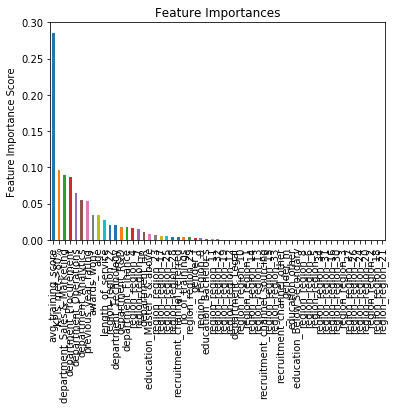

In [27]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
gbm0 = GradientBoostingClassifier(random_state=42,verbose = 1)
modelfit(gbm0,X, predictors)

In [41]:
param_test1 = {'n_estimators':np.arange(180,400,20)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,verbose = 1, min_samples_split=500,min_samples_leaf=50,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=-1,iid=False, cv=3,verbose=1)
gsearch1.fit(X,y)

Fitting 3 folds for each of 11 candidates, totalling 33 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5554           0.0239            7.65s
         1           0.5123           0.0644            6.52s
         2           0.5516           0.0111            7.80s
         2           0.5159           0.0054            6.66s
         3           0.5305           0.0149            7.36s
         3           0.5026           0.0075            6.41s
         4           0.5190           0.0103            7.19s
         4           0.4866           0.0168            6.81s
         5           0.5012           0.0185            7.15s
         5           0.4833           0.0060            6.39s
         6           0.4775           0.0026            6.18s
         6           0.5018           0.0074            7.33s
         7           0.4916           0.0042            7.02s
       

        10           0.4683           0.0059            8.58s
       200           0.3039          -0.0004            0.00s
        20           0.4491           0.0020            7.91s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5123           0.0644            8.15s
         2           0.5159           0.0054            8.68s
         3           0.5026           0.0075            8.78s
         4           0.4866           0.0168            9.50s
         5           0.4833           0.0060            9.08s
        30           0.4290          -0.0002            7.63s
         6           0.4775           0.0026            8.77s
         7           0.4738           0.0067            8.71s
         8           0.4676           0.0031            8.68s
         9           0.4624           0.0051            8.74s
        10           0.4552           0.0056            8.73s
        40           0.3962           0.0001            7.20s
       

         1           0.5123           0.0644            8.82s
         2           0.5159           0.0054            9.53s
         3           0.5026           0.0075            9.38s
         4           0.4866           0.0168           10.50s
         5           0.4833           0.0060           10.04s
         6           0.4775           0.0026            9.62s
         7           0.4738           0.0067            9.79s
         8           0.4676           0.0031            9.93s
         9           0.4624           0.0051           10.11s
        10           0.4552           0.0056           10.06s
        60           0.3682          -0.0001            7.83s
        20           0.4312           0.0006            9.11s
        70           0.3551           0.0017            7.41s
        30           0.4026           0.0029            8.93s
        80           0.3490           0.0003            7.03s
        40           0.3864           0.0006            8.31s
        

         7           0.4738           0.0067           11.19s
        70           0.3551           0.0017            8.86s
         8           0.4676           0.0031           11.57s
         9           0.4624           0.0051           11.91s
        10           0.4552           0.0056           11.92s
        80           0.3490           0.0003            8.50s
        20           0.4312           0.0006           10.76s
        90           0.3377          -0.0001            8.04s
        30           0.4026           0.0029           10.72s
       100           0.3304          -0.0002            7.67s
        40           0.3864           0.0006           10.09s
        50           0.3673          -0.0000            9.71s
        60           0.3521           0.0004            9.28s
        70           0.3459          -0.0000            8.82s
        80           0.3374           0.0005            8.41s
        90           0.3318           0.0003            7.90s
       1

         6           0.4775           0.0026           12.48s
         7           0.4738           0.0067           12.82s
         8           0.4676           0.0031           13.14s
         9           0.4624           0.0051           13.40s
        10           0.4552           0.0056           13.35s
        90           0.3377          -0.0001            9.48s
        20           0.4312           0.0006           12.21s
       100           0.3304          -0.0002            9.09s
        30           0.4026           0.0029           12.08s
        40           0.3864           0.0006           11.43s
        50           0.3673          -0.0000           11.01s
        60           0.3521           0.0004           10.64s
        70           0.3459          -0.0000           10.22s
        80           0.3374           0.0005            9.86s
        90           0.3318           0.0003            9.36s
       100           0.3284           0.0004            9.03s
       2

         6           0.4775           0.0026           13.75s
         7           0.4738           0.0067           13.92s
         8           0.4676           0.0031           14.02s
         9           0.4624           0.0051           14.40s
       100           0.3304          -0.0002           10.79s
        10           0.4552           0.0056           14.63s
        20           0.4312           0.0006           13.82s
        30           0.4026           0.0029           13.58s
        40           0.3864           0.0006           12.86s
        50           0.3673          -0.0000           12.44s
        60           0.3521           0.0004           11.94s
        70           0.3459          -0.0000           11.63s
        80           0.3374           0.0005           11.29s
        90           0.3318           0.0003           10.84s
       100           0.3284           0.0004           10.53s
       200           0.3088          -0.0001            6.87s
       2

[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:  3.0min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5459           0.0383           10.45s
         2           0.5402           0.0050           11.09s
         3           0.5308           0.0096           11.98s
         4           0.5286           0.0059           11.98s
         5           0.5053           0.0138           12.52s
         6           0.5093           0.0034           12.73s
         7           0.4988           0.0082           13.47s
         8           0.4972           0.0023           13.65s
         9           0.4886           0.0067           13.65s
        10           0.4829           0.0084           13.96s
        20           0.4425           0.0019           13.52s
        30           0.3924           0.0001           13.55s
        40           0.3816           0.0013           12.98s
        50           0.3698           0.0002           12.52s
        60           0.3635           0.0011           12.11s
       

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=1,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'n_estimators': array([180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380])},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=1)

In [42]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.48460, std: 0.00907, params: {'n_estimators': 180},
  mean: 0.48909, std: 0.00967, params: {'n_estimators': 200},
  mean: 0.49162, std: 0.00931, params: {'n_estimators': 220},
  mean: 0.49385, std: 0.00782, params: {'n_estimators': 240},
  mean: 0.49471, std: 0.00785, params: {'n_estimators': 260},
  mean: 0.49598, std: 0.00709, params: {'n_estimators': 280},
  mean: 0.49490, std: 0.00612, params: {'n_estimators': 300},
  mean: 0.49516, std: 0.00487, params: {'n_estimators': 320},
  mean: 0.49594, std: 0.00561, params: {'n_estimators': 340},
  mean: 0.49856, std: 0.00673, params: {'n_estimators': 360},
  mean: 0.50008, std: 0.00822, params: {'n_estimators': 380}],
 {'n_estimators': 380},
 0.5000844248553385)

In [44]:
#tuning max depth and min samples split

param_test2 = {'max_depth':np.arange(5,10,2),'min_samples_split':np.arange(500,1001,100)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,verbose = 1, n_estimators=600, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=-1,iid=False, cv=3,verbose =1)
gsearch2.fit(X,y)

Fitting 3 folds for each of 18 candidates, totalling 54 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5663           0.0127           17.12s
         1           0.5439           0.0335           16.26s
         2           0.5478           0.0051           15.72s
         2           0.5675           0.0072           19.18s
         3           0.5341           0.0067           15.54s
         3           0.5510           0.0096           18.90s
         4           0.5226           0.0119           16.44s
         4           0.5402           0.0095           18.49s
         5           0.5192           0.0068           15.74s
         5           0.5282           0.0129           18.07s
         6           0.5118           0.0043           15.83s
         6           0.5308           0.0062           18.25s
         7           0.5089           0.0053           15.96s
       

        70           0.3896           0.0007           19.41s
        70           0.3820           0.0005           19.54s
        80           0.3791          -0.0000           19.01s
        80           0.3735          -0.0000           19.04s
        90           0.3744           0.0001           18.58s
        90           0.3674          -0.0001           18.58s
       100           0.3652           0.0015           18.25s
       100           0.3623           0.0012           18.32s
       200           0.3298          -0.0002           15.35s
       200           0.3247          -0.0001           15.33s
       300           0.3078          -0.0001           11.32s
       300           0.3114          -0.0001           11.25s
       400           0.2932          -0.0001            7.45s
       400           0.3005          -0.0001            7.34s
       500           0.2911          -0.0001            3.65s
       500           0.2931          -0.0001            3.63s
       6

         8           0.5036           0.0042           22.81s
         7           0.5011           0.0071           21.50s
         9           0.4980           0.0059           23.13s
         8           0.4970           0.0036           21.68s
        10           0.4908           0.0054           23.28s
         9           0.4876           0.0057           21.93s
        10           0.4804           0.0064           22.76s
        20           0.4676           0.0017           21.39s
        20           0.4596           0.0015           20.91s
        30           0.4481           0.0009           20.66s
        30           0.4429           0.0040           20.91s
        40           0.4358           0.0011           20.05s
        40           0.4312           0.0011           20.11s
        50           0.4257           0.0002           19.24s
        50           0.4181           0.0001           19.87s
        60           0.3977           0.0011           19.12s
        

       600           0.2941          -0.0000            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
       600           0.2899          -0.0001            0.00s
         1           0.5443           0.0336           21.30s
         2           0.5481           0.0051           23.26s
         3           0.5360           0.0057           23.46s
         4           0.5247           0.0114           25.17s
         5           0.5208           0.0075           23.99s
         6           0.5133           0.0043           23.46s
         7           0.5042           0.0096           23.14s
         8           0.4979           0.0041           23.20s
         9           0.4918           0.0058           23.35s
        10           0.4856           0.0052           24.37s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5545           0.0282           19.50s
         2           0.5463           0.0071           20.45s
      

        70           0.3553           0.0006           28.82s
        60           0.3588           0.0003           27.93s
        80           0.3470           0.0008           27.95s
        70           0.3490           0.0006           27.86s
        90           0.3389          -0.0001           27.43s
        80           0.3407           0.0012           27.42s
       100           0.3344           0.0007           26.99s
        90           0.3300           0.0002           26.94s
       100           0.3237          -0.0001           26.50s
       200           0.2956          -0.0002           21.64s
       200           0.3010          -0.0001           21.15s
       300           0.2802          -0.0002           16.00s
       300           0.2804          -0.0002           15.50s
       400           0.2669          -0.0002           10.57s
       400           0.2706          -0.0002           10.23s
       500           0.2579          -0.0001            5.24s
       5

         9           0.4761           0.0053           32.94s
         5           0.5186           0.0114           31.11s
        10           0.4719           0.0036           33.17s
         6           0.5205           0.0064           31.54s
         7           0.5064           0.0082           30.62s
         8           0.4989           0.0037           29.63s
         9           0.4953           0.0073           29.87s
        10           0.4862           0.0081           30.40s
        20           0.4398           0.0022           30.64s
        20           0.4547           0.0026           29.31s
        30           0.4186           0.0025           30.26s
        30           0.4245           0.0008           27.87s
        40           0.4039           0.0005           29.81s
        40           0.3918           0.0003           28.20s
        50           0.3868           0.0002           29.31s
        50           0.3752           0.0001           27.84s
        

       500           0.2677          -0.0002            4.95s
       600           0.2618          -0.0003            0.00s
       600           0.2566          -0.0003            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5532           0.0306           27.04s
         2           0.5457           0.0049           27.78s
         3           0.5379           0.0058           27.66s
         4           0.5247           0.0160           31.83s
         5           0.5155           0.0098           31.77s
      Iter       Train Loss      OOB Improve   Remaining Time 
         6           0.5000           0.0060           32.07s
         1           0.5597           0.0213           33.66s
         7           0.4956           0.0111           32.13s
         2           0.5558           0.0112           35.57s
         8           0.4881           0.0064           32.38s
         3           0.5392           0.0089           35.00s
      

        60           0.3295           0.0007           39.61s
        60           0.3358           0.0002           40.08s
        70           0.3221           0.0001           39.31s
        70           0.3234           0.0004           39.37s
        80           0.3170           0.0001           38.37s
        80           0.3140          -0.0003           38.60s
        90           0.3077          -0.0001           37.27s
        90           0.3095          -0.0002           37.54s
       100           0.3023           0.0000           36.41s
       100           0.3053           0.0007           36.93s
       200           0.2747          -0.0001           28.94s
       200           0.2767          -0.0002           28.88s
       300           0.2488          -0.0001           21.42s
       300           0.2513          -0.0003           21.44s
       400           0.2324          -0.0002           14.08s
       400           0.2348          -0.0002           14.19s
       5

         1           0.5531           0.0223           43.67s
         2           0.5480           0.0134           41.91s
         3           0.5301           0.0124           43.11s
         4           0.5157           0.0144           44.13s
         5           0.5101           0.0088           42.01s
         6           0.5031           0.0056           42.38s
         7           0.4929           0.0127           42.59s
         8           0.4815           0.0082           43.83s
        30           0.3994           0.0005           40.01s
         9           0.4699           0.0111           43.89s
        10           0.4645           0.0049           43.69s
        40           0.3683           0.0040           39.62s
        20           0.4248           0.0016           41.24s
        50           0.3534           0.0005           38.80s
        30           0.3980           0.0020           41.02s
        60           0.3365           0.0010           38.24s
        

[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 11.3min


         5           0.5080           0.0087           43.32s
         1           0.5591           0.0230           42.54s
         6           0.4960           0.0100           42.45s
         2           0.5451           0.0113           41.84s
         7           0.4883           0.0081           42.44s
         3           0.5325           0.0101           40.87s
         8           0.4776           0.0075           42.92s
         4           0.5243           0.0093           42.69s
         9           0.4654           0.0109           42.90s
         5           0.5164           0.0097           41.95s
        10           0.4604           0.0046           42.27s
         6           0.5004           0.0056           41.30s
         7           0.5016           0.0071           41.04s
         8           0.4964           0.0033           42.12s
         9           0.4858           0.0065           42.74s
        10           0.4801           0.0052           42.44s
        

       100           0.3194           0.0002           32.69s
       200           0.2900          -0.0002           24.94s
       200           0.2868          -0.0002           25.51s
       300           0.2678          -0.0003           18.61s
       300           0.2701          -0.0002           19.06s
       400           0.2580          -0.0003           12.36s
       400           0.2564          -0.0002           12.56s
       500           0.2458          -0.0003            6.15s
       500           0.2456          -0.0003            6.29s
       600           0.2331          -0.0002            0.00s
       600           0.2368          -0.0002            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5535           0.0220           41.03s
         2           0.5478           0.0138           37.84s
         3           0.5298           0.0120           37.92s
         4           0.5153           0.0146           39.99s
       

[Parallel(n_jobs=-1)]: Done  54 out of  54 | elapsed: 13.9min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5617           0.0216           24.03s
         2           0.5496           0.0121           28.58s
         3           0.5414           0.0080           31.44s
         4           0.5322           0.0111           32.00s
         5           0.5069           0.0162           33.03s
         6           0.5082           0.0054           33.17s
         7           0.4992           0.0065           32.93s
         8           0.4947           0.0054           32.91s
         9           0.4827           0.0098           32.68s
        10           0.4815           0.0020           32.22s
        20           0.4441           0.0028           32.09s
        30           0.4174           0.0011           31.01s
        40           0.4016           0.0047           30.32s
        50           0.3829           0.0003           29.54s
        60           0.3678           0.0018           29.43s
       

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              presort='auto', random_state=10, subsample=0.8, verbose=1,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'max_depth': array([5, 7, 9]), 'min_samples_split': array([ 500,  600,  700,  800,  900, 1000])},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=1)

In [45]:
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.50705, std: 0.00927, params: {'max_depth': 5, 'min_samples_split': 500},
  mean: 0.50636, std: 0.00836, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.50719, std: 0.00482, params: {'max_depth': 5, 'min_samples_split': 700},
  mean: 0.50547, std: 0.00831, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.50143, std: 0.00736, params: {'max_depth': 5, 'min_samples_split': 900},
  mean: 0.50393, std: 0.00744, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.51290, std: 0.00734, params: {'max_depth': 7, 'min_samples_split': 500},
  mean: 0.51299, std: 0.00599, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.50936, std: 0.00593, params: {'max_depth': 7, 'min_samples_split': 700},
  mean: 0.50981, std: 0.00899, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.50723, std: 0.00823, params: {'max_depth': 7, 'min_samples_split': 900},
  mean: 0.50908, std: 0.00474, params: {'max_depth': 7, 'min_samples_split': 1000},
  

In [47]:
#Tuning min_samples_leaf after updating the latest hyperparameter values i.e max_depth and min_samples_split

param_test3 = {'min_samples_leaf':np.arange(50,100,10)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=600,min_samples_split=600,max_depth=7,max_features='sqrt',verbose = 1, subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='f1',n_jobs=-1,iid=False, cv=3,verbose = 1)

gsearch3.fit(X,y)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5608           0.0197           22.50s
      Iter       Train Loss      OOB Improve   Remaining Time 
         2           0.5547           0.0132           23.49s
         1           0.5560           0.0190           25.59s
         3           0.5363           0.0112           23.72s
         2           0.5578           0.0072           24.78s
         4           0.5272           0.0084           22.81s
         3           0.5438           0.0085           24.85s
         5           0.5108           0.0178           22.51s
         6           0.5116           0.0063           22.36s
         4           0.5345           0.0088           25.57s
         7           0.4978           0.0083           21.21s
         5           0.5273           0.0104           24.67s
         8           0.4914           0.0031           20.46s
        

        70           0.3535           0.0005           27.90s
        70           0.3562           0.0005           27.56s
        80           0.3457           0.0008           27.25s
        80           0.3524           0.0002           26.83s
        90           0.3425          -0.0000           26.41s
        90           0.3446           0.0005           26.25s
       100           0.3388           0.0010           26.11s
       100           0.3418           0.0014           26.05s
       200           0.3130          -0.0001           20.44s
       200           0.3090          -0.0002           20.39s
       300           0.2938          -0.0001           15.14s
       300           0.2960          -0.0002           15.18s
       400           0.2801          -0.0002            9.94s
       400           0.2863          -0.0002            9.96s
       500           0.2770          -0.0001            4.93s
       500           0.2789          -0.0001            4.94s
       6

         5           0.5076           0.0075           35.74s
        10           0.4939           0.0049           34.37s
         6           0.4931           0.0054           35.89s
         7           0.4915           0.0083           35.99s
         8           0.4860           0.0041           35.94s
         9           0.4768           0.0057           36.15s
        10           0.4708           0.0049           36.53s
        20           0.4666           0.0024           32.21s
        20           0.4481           0.0013           31.84s
        30           0.4385           0.0027           31.53s
        30           0.4279           0.0028           31.03s
        40           0.4134           0.0005           30.09s
        40           0.4156           0.0006           29.70s
        50           0.3992           0.0021           29.04s
        50           0.4015           0.0001           28.90s
        60           0.3751           0.0023           28.80s
        

[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.9min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5618           0.0216           22.96s
         2           0.5507           0.0112           24.65s
         3           0.5395           0.0108           26.22s
         4           0.5328           0.0097           26.63s
         5           0.5077           0.0155           27.67s
         6           0.5121           0.0032           27.99s
         7           0.5029           0.0070           29.29s
         8           0.4984           0.0043           29.91s
         9           0.4862           0.0102           30.67s
        10           0.4850           0.0024           31.07s
        20           0.4464           0.0035           29.73s
        30           0.4240           0.0011           29.00s
        40           0.4080           0.0007           28.62s
        50           0.3892           0.0004           28.55s
        60           0.3731           0.0017           28.54s
       

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=600,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              presort='auto', random_state=10, subsample=0.8, verbose=1,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'min_samples_leaf': array([50, 60, 70, 80, 90])},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=1)

In [48]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.50164, std: 0.00648, params: {'min_samples_leaf': 50},
  mean: 0.50591, std: 0.00419, params: {'min_samples_leaf': 60},
  mean: 0.50212, std: 0.00728, params: {'min_samples_leaf': 70},
  mean: 0.50205, std: 0.00501, params: {'min_samples_leaf': 80},
  mean: 0.49898, std: 0.00374, params: {'min_samples_leaf': 90}],
 {'min_samples_leaf': 60},
 0.5059102797924531)

In [49]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, verbose = 1 , n_estimators=600,max_depth=7,min_samples_split=600, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='f1',n_jobs=-1,iid=False, cv=3,verbose = 1)

gsearch5.fit(X,y)



Fitting 3 folds for each of 6 candidates, totalling 18 fits
      Iter       Train Loss      OOB Improve   Remaining Time 
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5577           0.0179           20.63s
         1           0.5532           0.0279           20.00s
         2           0.5517           0.0182           22.12s
         2           0.5497           0.0069           19.12s
         3           0.5326           0.0080           23.04s
         3           0.5334           0.0088           20.03s
         4           0.5306           0.0070           24.55s
         4           0.5266           0.0077           23.23s
         5           0.5155           0.0101           26.55s
         5           0.5191           0.0104           24.10s
         6           0.5150           0.0072           27.87s
         6           0.5170           0.0040           25.84s
         7           0.5147           0.0077           26.68s
        

        80           0.3502           0.0010           27.43s
        60           0.3739           0.0007           28.61s
        90           0.3431           0.0004           26.79s
        70           0.3644           0.0006           28.17s
       100           0.3411           0.0018           26.50s
        80           0.3530           0.0005           27.60s
        90           0.3489           0.0001           27.06s
       100           0.3416           0.0013           26.74s
       200           0.3136          -0.0002           20.57s
       200           0.3147          -0.0001           20.60s
       300           0.2921          -0.0002           15.26s
       300           0.2967          -0.0002           15.32s
       400           0.2812          -0.0002           10.09s
       400           0.2887          -0.0001           10.09s
       500           0.2761          -0.0002            5.01s
       500           0.2826          -0.0002            4.99s
       6

         2           0.5434           0.0054           31.10s
         3           0.5314           0.0072           31.32s
         4           0.5143           0.0227           34.06s
         5           0.5055           0.0086           32.88s
         6           0.4913           0.0054           32.80s
        40           0.4108           0.0005           31.48s
         7           0.4895           0.0088           32.58s
         8           0.4811           0.0064           32.71s
         9           0.4722           0.0054           32.46s
        10           0.4671           0.0045           32.66s
        50           0.3902           0.0007           30.29s
        20           0.4393           0.0009           30.13s
        60           0.3656           0.0024           29.70s
        30           0.4162           0.0034           29.44s
        70           0.3535           0.0005           29.10s
        40           0.4023           0.0007           28.15s
        

       600           0.2700          -0.0002            0.00s
      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5650           0.0159           31.70s
         2           0.5543           0.0059           30.22s
         3           0.5464           0.0070           31.95s
         4           0.5315           0.0108           34.45s
         5           0.5256           0.0095           33.62s
         6           0.5158           0.0078           33.78s
         7           0.5064           0.0125           34.21s
         8           0.4965           0.0069           35.09s
       600           0.2646          -0.0002            0.00s
         9           0.4867           0.0065           35.74s
        10           0.4834           0.0034           35.12s
      Iter       Train Loss      OOB Improve   Remaining Time 
        20           0.4535           0.0034           32.25s
         1           0.5546           0.0338           33.38s
      

[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  4.6min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5618           0.0216           22.02s
         2           0.5507           0.0112           24.35s
         3           0.5395           0.0108           26.74s
         4           0.5328           0.0097           28.33s
         5           0.5077           0.0155           30.24s
         6           0.5121           0.0032           31.12s
         7           0.5029           0.0070           31.50s
         8           0.4984           0.0043           31.27s
         9           0.4862           0.0102           31.33s
        10           0.4850           0.0024           31.31s
        20           0.4464           0.0035           31.29s
        30           0.4240           0.0011           30.12s
        40           0.4080           0.0007           29.15s
        50           0.3892           0.0004           28.97s
        60           0.3731           0.0017           28.93s
       

GridSearchCV(cv=3, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=7,
              max_features=7, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=60, min_samples_split=600,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              presort='auto', random_state=10, subsample=0.8, verbose=1,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=-1,
       param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1', verbose=1)

In [50]:
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.49714, std: 0.00323, params: {'subsample': 0.6},
  mean: 0.49890, std: 0.00691, params: {'subsample': 0.7},
  mean: 0.50037, std: 0.00378, params: {'subsample': 0.75},
  mean: 0.50591, std: 0.00419, params: {'subsample': 0.8},
  mean: 0.50281, std: 0.00537, params: {'subsample': 0.85},
  mean: 0.50246, std: 0.00276, params: {'subsample': 0.9}],
 {'subsample': 0.8},
 0.5059102797924531)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5618           0.0216           23.75s
         2           0.5507           0.0112           27.46s
         3           0.5395           0.0108           29.15s
         4           0.5328           0.0097           29.22s
         5           0.5077           0.0155           30.48s
         6           0.5121           0.0032           31.05s
         7           0.5029           0.0070           31.64s
         8           0.4984           0.0043           31.67s
         9           0.4862           0.0102           31.91s
        10           0.4850           0.0024           31.95s
        20           0.4464           0.0035           31.45s
        30           0.4240           0.0011           30.33s
        40           0.4080           0.0007           29.58s
        50           0.3892           0.0004           29.36s
        60           0.3731           0.0017           29.31s
       

        20           0.4422           0.0023           22.49s
        30           0.4145           0.0008           22.61s
        40           0.4016           0.0002           23.13s
        50           0.3804           0.0015           22.83s
        60           0.3681           0.0004           22.32s
        70           0.3609          -0.0001           21.98s
        80           0.3492          -0.0000           21.91s
        90           0.3432           0.0010           21.48s
       100           0.3406           0.0000           20.96s
       200           0.3077          -0.0001           16.91s
       300           0.2980          -0.0001           12.49s
       400           0.2865          -0.0002            8.20s
       500           0.2818          -0.0001            4.08s
       600           0.2741          -0.0001            0.00s

Model Report
F1 Score : 0.538296568627451
CV Score : Mean - 0.5023585 | Std - 0.02037019 | Min - 0.4717711 | Max - 0.5349544


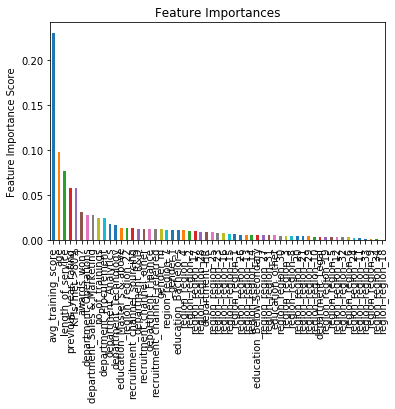

In [52]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=600,max_depth=7, min_samples_split=600,min_samples_leaf=60, subsample=0.8, random_state=10, max_features=7,verbose=1 )
modelfit(gbm_tuned_1,X,predictors)

In [53]:
pred = gbm_tuned_1.predict(test)

In [ ]:
# Read the submission file
submission=pd.read_csv("sample_submission.csv")

In [ ]:
submission.head()

In [ ]:
# Fill the is_pass variable with the predictions
submission['is_promoted']=pred

In [ ]:
submission['is_promoted'] = submission['is_promoted'].astype(np.int64)

In [ ]:
submission.head()

In [ ]:
submission['is_promoted'].value_counts()

In [ ]:
# Converting the submission file to csv format
submission.to_csv('logistic_submission.csv', index=False)

score on leaderboard - 0.71145